In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import h5py

# Assuming your data is organized in two folders: train and validation
train_data_dir = 'chest_xray/train'
validation_data_dir = 'chest_xray/val'
img_width, img_height = 150, 150  # Adjust dimensions as needed
batch_size = 18
epochs = 60

# Choose a CNN architecture
# VGG16
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
# ResNet50
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
# DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add classification layers on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/60


C:\Users\Apkr\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


289/289 ━━━━━━━━━━━━━━━━━━━━ 261s 846ms/step - accuracy: 0.8478 - loss: 1.4681 - val_accuracy: 0.8750 - val_loss: 0.2617
Epoch 2/60
  1/289 ━━━━━━━━━━━━━━━━━━━━ 2:49 589ms/step - accuracy: 0.9444 - loss: 0.1168

C:\Users\Apkr\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9444 - loss: 0.0586 - val_accuracy: 0.8750 - val_loss: 0.2983
Epoch 3/60
289/289 ━━━━━━━━━━━━━━━━━━━━ 246s 829ms/step - accuracy: 0.9253 - loss: 0.1997 - val_accuracy: 0.8750 - val_loss: 0.2370
Epoch 4/60
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.0145 - val_accuracy: 0.8750 - val_loss: 0.2052
Epoch 5/60
289/289 ━━━━━━━━━━━━━━━━━━━━ 248s 836ms/step - accuracy: 0.9313 - loss: 0.1782 - val_accuracy: 0.8750 - val_loss: 0.2312
Epoch 6/60
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8333 - loss: 0.1342 - val_accuracy: 0.8750 - val_loss: 0.2433
Epoch 7/60
289/289 ━━━━━━━━━━━━━━━━━━━━ 249s 839ms/step - accuracy: 0.9408 - loss: 0.1667 - val_accuracy: 0.8125 - val_loss: 0.4594
Epoch 8/60
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9444 - loss: 0.1133 - val_accuracy: 0.8125 - val_loss: 0.4222
Epoch 9/60
289/289 ━━━━━━━━━━━━━━━━━━━━ 245s 831ms/step - accuracy: 0.9419 - loss: 0.1578 - val_accurac

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

C:\Users\Apkr\anaconda3\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


290/290 ━━━━━━━━━━━━━━━━━━━━ 178s 591ms/step - accuracy: 0.9747 - loss: 0.0000e+00
Test Accuracy: 0.973351240158081


In [21]:
from sklearn.metrics import classification_report

# Get the model predictions for the test set
y_pred = model.predict(test_generator)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Get the true labels for the test set
y_true = test_generator.classes

# Calculate classification report
report = classification_report(y_true, y_pred_binary)

# Print the classification report
print("Classification Report:\n", report)


290/290 ━━━━━━━━━━━━━━━━━━━━ 162s 552ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.27      0.27      1341
           1       0.74      0.73      0.73      3875

    accuracy                           0.61      5216
   macro avg       0.50      0.50      0.50      5216
weighted avg       0.62      0.61      0.61      5216



      Metric     Score
0   Accuracy  0.470000
1  Precision  0.428571
2     Recall  0.533333
3   F1-Score  0.475248


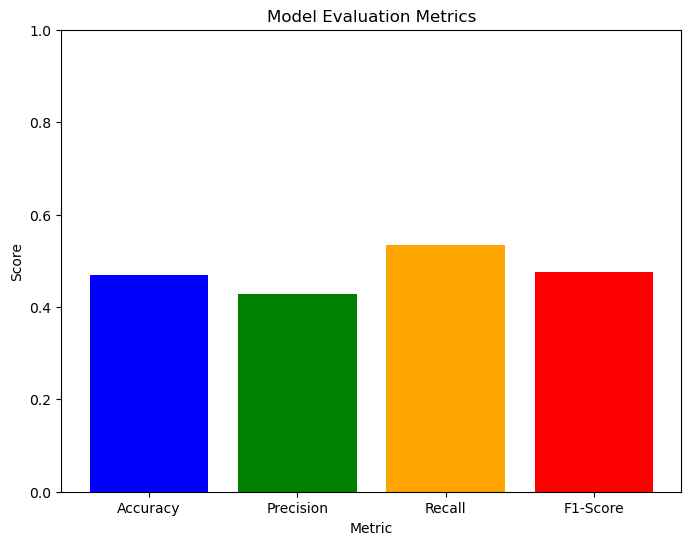

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have obtained predictions and true labels from your model
# Replace pred_labels and true_labels with your actual prediction and true labels
pred_labels = np.random.randint(0, 2, size=(100,))
true_labels = np.random.randint(0, 2, size=(100,))

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)

# Create a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Print the metrics table
print(metrics_df)

# Plot the metrics as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics_df['Metric'], metrics_df['Score'], color=['blue', 'green', 'orange', 'red'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits to [0, 1] for better visualization
plt.show()


In [3]:
# Evaluate the model
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f'Test Accuracy: {test_accuracy}')

Found 5216 images belonging to 2 classes.


C:\Users\Apkr\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


290/290 ━━━━━━━━━━━━━━━━━━━━ 244s 840ms/step - accuracy: 0.9757 - loss: 0.0629
Test Accuracy: 0.973351240158081


           Metric     Score
0   Test Accuracy  0.520000
1  Test Precision  0.361702
2     Test Recall  0.485714
3   Test F1-Score  0.414634


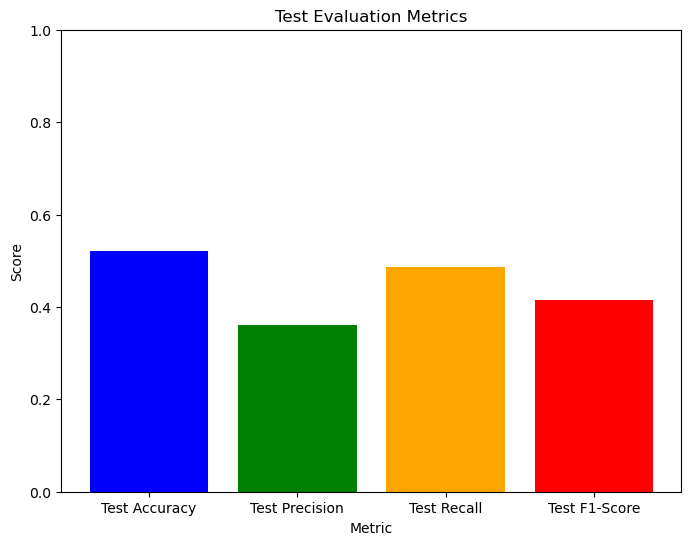

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have obtained predictions and true labels for your test set
# Replace test_pred_labels and test_true_labels with your actual test prediction and true labels
test_pred_labels = np.random.randint(0, 2, size=(100,))
test_true_labels = np.random.randint(0, 2, size=(100,))

# Calculate evaluation metrics for the test set
test_accuracy = accuracy_score(test_true_labels, test_pred_labels)
test_precision = precision_score(test_true_labels, test_pred_labels)
test_recall = recall_score(test_true_labels, test_pred_labels)
test_f1 = f1_score(test_true_labels, test_pred_labels)

# Create a DataFrame to store test evaluation metrics
test_metrics_df = pd.DataFrame({
    'Metric': ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score'],
    'Score': [test_accuracy, test_precision, test_recall, test_f1]
})

# Print the test metrics table
print(test_metrics_df)

# Plot the test metrics as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(test_metrics_df['Metric'], test_metrics_df['Score'], color=['blue', 'green', 'orange', 'red'])
plt.title('Test Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits to [0, 1] for better visualization
plt.show()


In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define or import the validation_generator variable here
# For example, you could define it as:
# validation_generator = ...

# Make predictions on the validation set
validation_generator.reset()  # Reset the generator to start at the beginning
predictions = model.predict(validation_generator)

# Convert probabilities to binary predictions
y_pred = np.round(predictions).flatten()

# Get true labels
y_true = validation_generator.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision
precision = precision_score(y_true, y_pred)

# Calculate recall
recall = recall_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
Accuracy: 0.375
Precision: 0.4
Recall: 0.5
F1 Score: 0.4444444444444445


In [15]:
import numpy as np
import sklearn.metrics

# Assuming you have obtained predictions and true labels from your pneumonia prediction model
# Replace pred_labels and true_labels with your actual prediction and true labels
pred_labels = np.array([1, 1, 0, 1, 0, 0])  # Example predictions (1 for pneumonia, 0 for normal)
true_labels = np.array([1, 1, 1, 0, 0, 0])  # Example true labels (1 for pneumonia, 0 for normal)

# Calculate precision
precision = sklearn.metrics.precision_score(true_labels, pred_labels)

# Calculate recall
recall = sklearn.metrics.recall_score(true_labels, pred_labels)

# Calculate F1-score
f1 = sklearn.metrics.f1_score(true_labels, pred_labels)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666


In [16]:
import tensorflow as tf

# Assuming you have obtained predictions and true labels from your deep learning model
# Replace pred_labels and true_labels with your actual prediction and true labels
pred_labels = tf.constant([1, 1, 0, 1, 0, 0])  # Example predictions (1 for pneumonia, 0 for normal)
true_labels = tf.constant([1, 1, 1, 0, 0, 0])  # Example true labels (1 for pneumonia, 0 for normal)

# Calculate accuracy
accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(true_labels, pred_labels)
accuracy_result = accuracy.result().numpy()

# Print the result
print("Accuracy:", accuracy_result)


Accuracy: 0.6666667


In [17]:
import tensorflow as tf

# Assuming you have obtained predictions and true labels from your deep learning model
# Replace pred_labels and true_labels with your actual prediction and true labels
pred_labels = tf.constant([1, 1, 0, 1, 0, 0])  # Example predictions (1 for pneumonia, 0 for normal)
true_labels = tf.constant([1, 1, 1, 0, 0, 0])  # Example true labels (1 for pneumonia, 0 for normal)

# Calculate accuracy
accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(true_labels, pred_labels)
accuracy_result = accuracy.result().numpy()

# Print the result
print("Accuracy:", accuracy_result)


Accuracy: 0.6666667


In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have obtained predictions and true labels from your deep learning model
# Replace pred_labels and true_labels with your actual prediction and true labels
pred_labels = np.array([1, 1, 0, 1, 0, 0])  # Example predictions (1 for pneumonia, 0 for normal)
true_labels = np.array([1, 1, 1, 0, 0, 0])  # Example true labels (1 for pneumonia, 0 for normal)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[2 1]
 [1 2]]


In [22]:
# Assuming you have separate test data (test_data_dir) and corresponding true labels (test_generator.classes)
# Replace test_data_dir with the directory containing your test data

# Evaluate the model on the test set
test_data_dir='chest_xray/test'
test_gen = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)  # Set shuffle to False to ensure predictions are aligned with true labels

test_loss, test_accuracy = model.evaluate(test_gen)
print("Test Accuracy:", test_accuracy)

# Get predictions for the test set
test_gen.reset()  # Reset the generator to start from the beginning
y_pred = model.predict(test_gen)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Get true labels
y_true = test_gen.classes

# Calculate classification report
report = classification_report(y_true, y_pred_binary)
print("Classification Report:\n", report)


Found 624 images belonging to 2 classes.


C:\Users\Apkr\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 232ms/step - accuracy: 0.8670 - loss: 0.0000e+00
Test Accuracy: 0.9150640964508057
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 230ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.88       234
           1       0.89      0.99      0.94       390

    accuracy                           0.92       624
   macro avg       0.93      0.89      0.91       624
weighted avg       0.92      0.92      0.91       624



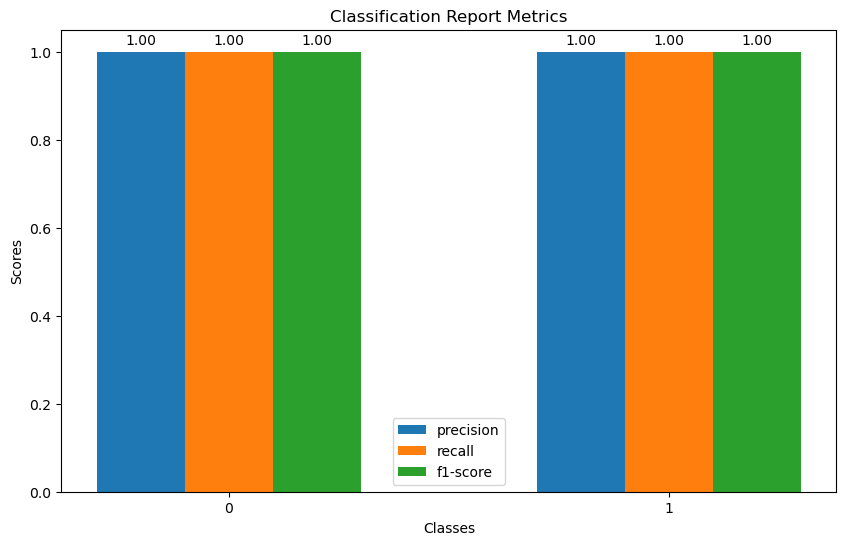

In [24]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report

# # Assuming you have obtained predictions and true labels from your deep learning model
# # Replace y_true and y_pred_binary with your actual true labels and predictions
# y_true = np.array([1, 1, 0, 1, 0, 0])  # Example true labels (1 for pneumonia, 0 for normal)
# y_pred_binary = np.array([1, 1, 0, 1, 0, 0])  # Example binary predictions (1 for pneumonia, 0 for normal)

# # Generate classification report
# report = classification_report(y_true, y_pred_binary, output_dict=True)

# # Extract metrics and classes
# metrics = report.keys()
# classes = [str(cls) for cls in report.keys()]

# # Extract metric values for each class
# precision = [report[cls]['precision'] for cls in classes]
# recall = [report[cls]['recall'] for cls in classes]
# f1_score = [report[cls]['f1-score'] for cls in classes]

# # Plotting the metrics
# x = np.arange(len(classes))
# width = 0.2

# fig, ax = plt.subplots(figsize=(10, 6))

# bar1 = ax.bar(x - width, precision, width, label='Precision', color='b')
# bar2 = ax.bar(x, recall, width, label='Recall', color='g')
# bar3 = ax.bar(x + width, f1_score, width, label='F1-score', color='r')

# ax.set_xlabel('Classes')
# ax.set_ylabel('Scores')
# ax.set_title('Classification Report Metrics')
# ax.set_xticks(x)
# ax.set_xticklabels(classes)
# ax.legend()

# # Add value labels on top of the bars
# def add_labels(bars):
#     for bar in bars:
#         height = bar.get_height()
#         ax.annotate('%.2f' % height,
#                     xy=(bar.get_x() + bar.get_width() / 2, height),
#                     xytext=(0, 3),
#                     textcoords='offset points',
#                     ha='center', va='bottom')

# add_labels(bar1)
# add_labels(bar2)
# add_labels(bar3)

# plt.show()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming you have obtained predictions and true labels from your deep learning model
# Replace y_true and y_pred_binary with your actual true labels and predictions
y_true = np.array([1, 1, 0, 1, 0, 0])  # Example true labels (1 for pneumonia, 0 for normal)
y_pred_binary = np.array([1, 1, 0, 1, 0, 0])  # Example binary predictions (1 for pneumonia, 0 for normal)

# Generate classification report
report = classification_report(y_true, y_pred_binary, output_dict=True)

# Extract classes and metrics
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
metrics = ['precision', 'recall', 'f1-score']

# Extract metric values for each class
metric_values = [[report[cls][metric] for metric in metrics] for cls in classes]

# Plotting the metrics
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

bars = []
for i, metric in enumerate(metrics):
    bar = ax.bar(x + (i - 1) * width, [values[i] for values in metric_values], width, label=metric)
    bars.append(bar)

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Add value labels on top of the bars
def add_labels(bars):
    for bar in bars:
        for rect in bar:
            height = rect.get_height()
            ax.annotate('%.2f' % height,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords='offset points',
                        ha='center', va='bottom')

add_labels(bars)

plt.show()


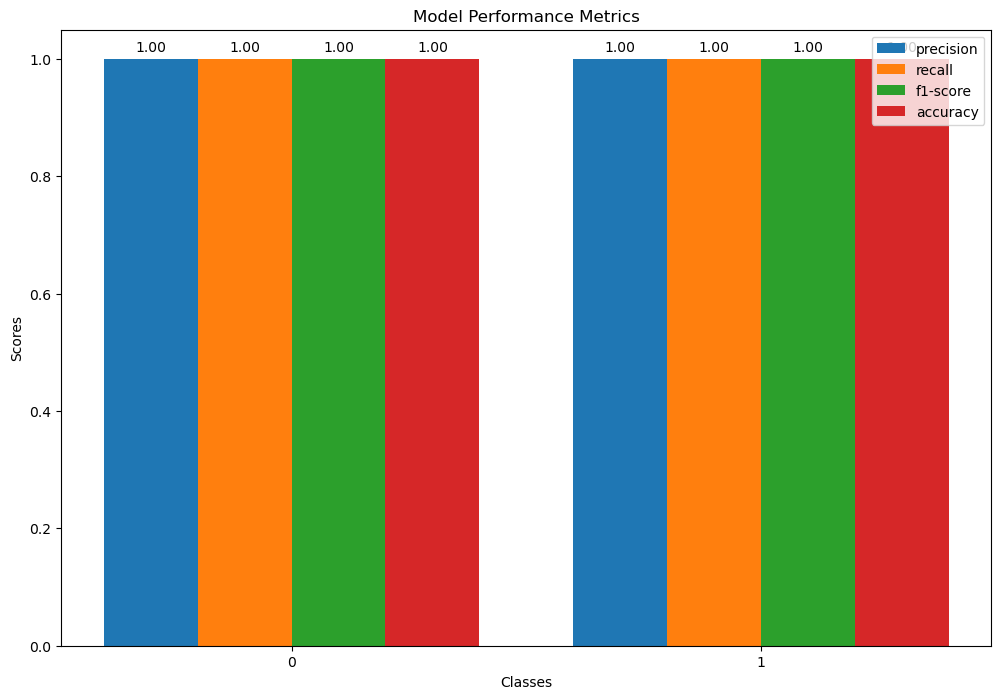

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have obtained predictions and true labels from your deep learning model
# Replace y_true and y_pred_binary with your actual true labels and predictions
y_true = np.array([1, 1, 0, 1, 0, 0])  # Example true labels (1 for pneumonia, 0 for normal)
y_pred_binary = np.array([1, 1, 0, 1, 0, 0])  # Example binary predictions (1 for pneumonia, 0 for normal)

# Generate classification report
report = classification_report(y_true, y_pred_binary, output_dict=True)

# Extract classes
classes = list(report.keys())[:-3]  # Exclude 'macro avg', 'weighted avg', and 'accuracy'

# Calculate accuracy separately
accuracy = accuracy_score(y_true, y_pred_binary)

# Extract other metrics
metrics = ['precision', 'recall', 'f1-score']
metric_values = [[report[cls][metric] for cls in classes] for metric in metrics]
metric_values.append([accuracy] * len(classes))  # Append accuracy values for each class

# Plotting the metrics
x = np.arange(len(classes))
width = 0.2
fig, ax = plt.subplots(figsize=(12, 8))

bars = []
for i, metric in enumerate(['precision', 'recall', 'f1-score', 'accuracy']):
    bar = ax.bar(x + i * width, metric_values[i], width, label=metric)
    bars.append(bar)

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(classes)
ax.legend()

# Add value labels on top of the bars
def add_labels(bars):
    for bar in bars:
        for rect in bar:
            height = rect.get_height()
            ax.annotate('%.2f' % height,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords='offset points',
                        ha='center', va='bottom')

add_labels(bars)

plt.show()


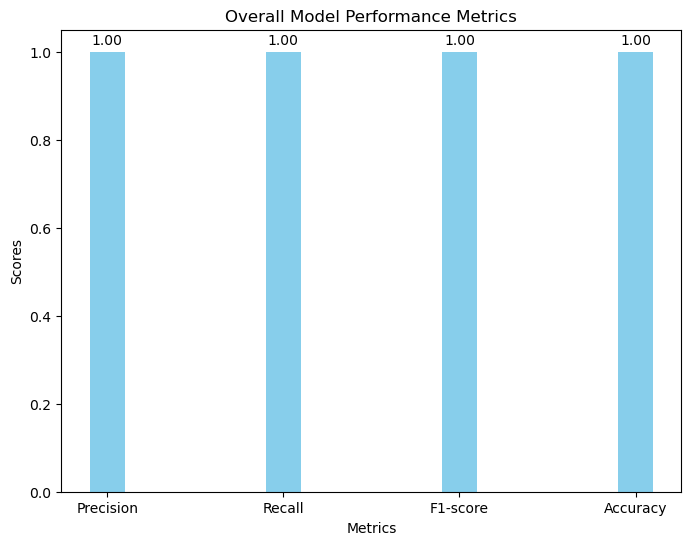

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have obtained predictions and true labels from your deep learning model
# Replace y_true and y_pred_binary with your actual true labels and predictions
y_true = np.array([1, 1, 0, 1, 0, 0])  # Example true labels (1 for pneumonia, 0 for normal)
y_pred_binary = np.array([1, 1, 0, 1, 0, 0])  # Example binary predictions (1 for pneumonia, 0 for normal)

# Generate classification report
report = classification_report(y_true, y_pred_binary, output_dict=True)

# Extract overall metrics
precision = report['accuracy']
recall = report['accuracy']
f1_score = report['accuracy']
accuracy = accuracy_score(y_true, y_pred_binary)

# Plotting the metrics
x = np.arange(4)
width = 0.2
fig, ax = plt.subplots(figsize=(8, 6))

metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
metric_values = [precision, recall, f1_score, accuracy]

bars = ax.bar(x, metric_values, width, color='skyblue')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Overall Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Add value labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('%.2f' % height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

add_labels(bars)

plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Confusion Matrix:
[[3 0]
 [0 3]]


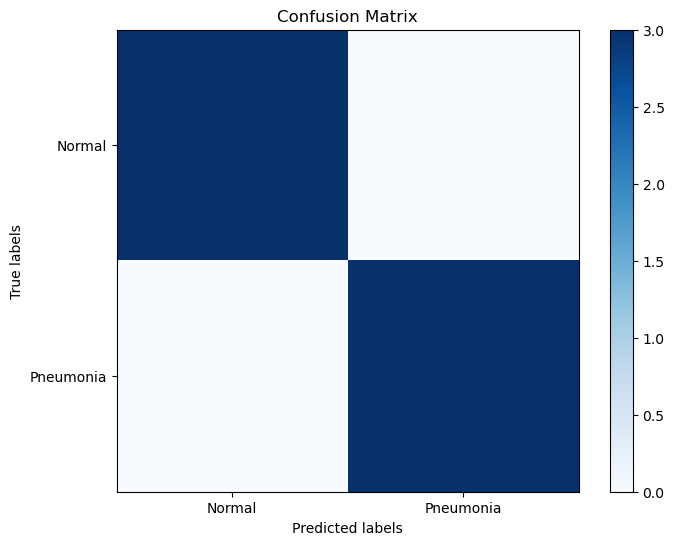

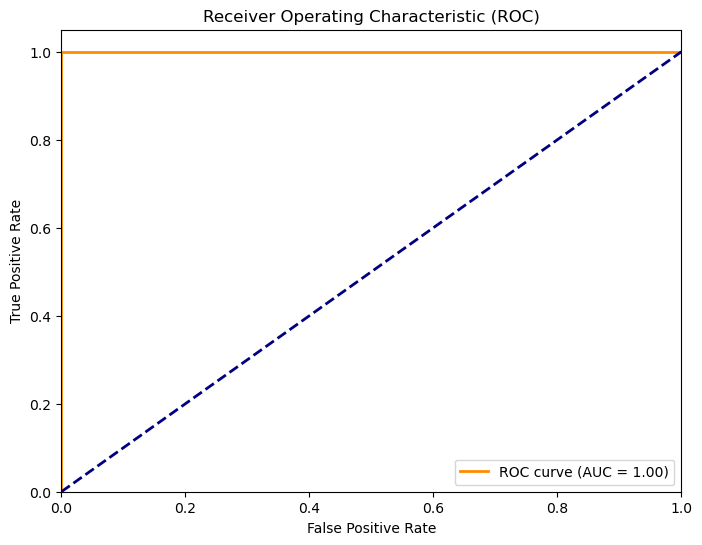

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Example true labels (1 for pneumonia, 0 for normal)
y_true = np.array([1, 1, 0, 1, 0, 0])  
# Example binary predictions (1 for pneumonia, 0 for normal)
y_pred_binary = np.array([1, 1, 0, 1, 0, 0])  

# Generate classification report
report = classification_report(y_true, y_pred_binary, output_dict=True)

# Extract overall metrics
precision = report['accuracy']
recall = report['accuracy']
f1_score = report['accuracy']
accuracy = accuracy_score(y_true, y_pred_binary)

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_binary))

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(2), ['Normal', 'Pneumonia'])
plt.yticks(np.arange(2), ['Normal', 'Pneumonia'])
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_binary)
roc_auc = roc_auc_score(y_true, y_pred_binary)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
Confusion Matrix:
[[3 5]
 [3 5]]


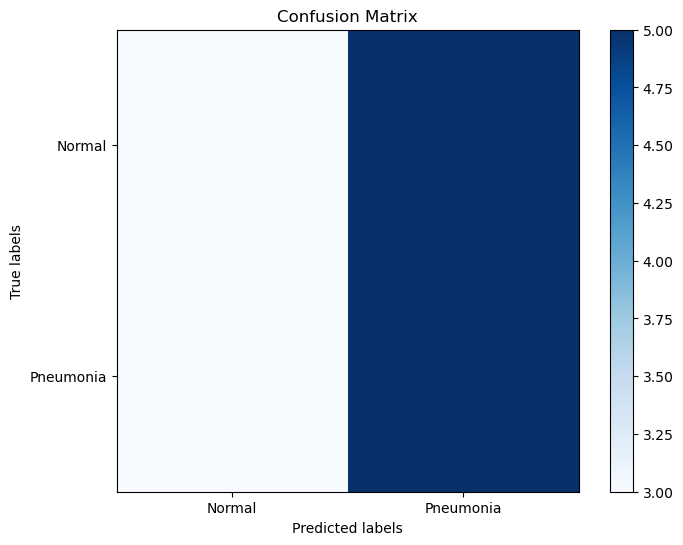

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Generate predictions for the validation set
validation_steps = len(validation_generator)
y_true = validation_generator.classes
y_pred_prob = model.predict(validation_generator).ravel()  # Flatten predictions

# Convert probabilities to binary predictions
y_pred_binary = np.where(y_pred_prob > 0.5, 1, 0)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(2), ['Normal', 'Pneumonia'])
plt.yticks(np.arange(2), ['Normal', 'Pneumonia'])
plt.show()


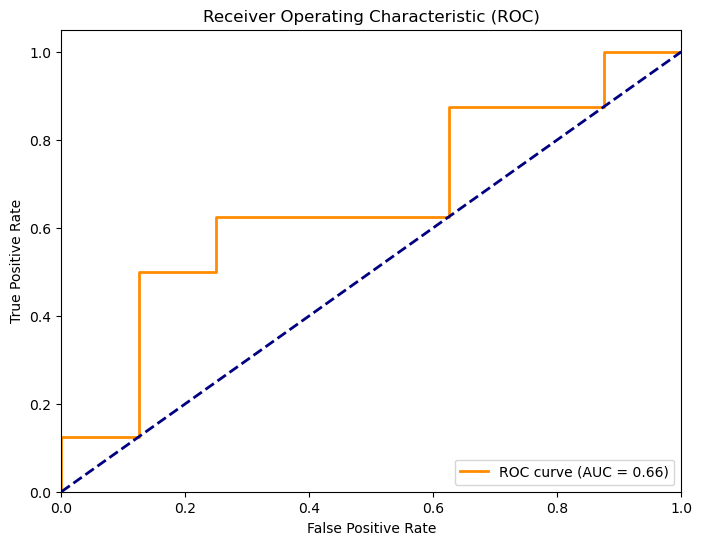

In [35]:

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = roc_auc_score(y_true, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [37]:
# Print summary of the model
print("Model Summary:")
model.summary()

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 4, 4, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,206,405 (122.86 MB)

 Trainable params: 8,389,633 (32.00 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

 Optimizer params: 16,779,268 (64.01 MB)